# Домашнее задание. Pandas

In [36]:
import pandas as pd
df = pd.read_csv('TSLA.csv');

1. Вывести все колонки из DataFrame

In [30]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


2. Посчитать среднюю цену закрытия акций Tesla, в периуд с открытия по 10.01.2012

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

end_date = pd.to_datetime('2012-01-10')

filtered_df = df[df['Date'] <= end_date]

mean_close_price = filtered_df['Close'].mean()

print("Средняя цена закрытия акций Tesla с начала торгов до 10.01.2012 составляет:", mean_close_price)

Средняя цена закрытия акций Tesla с начала торгов до 10.01.2012 составляет: 25.654458737113405


3. Вывести график цены закрытия 

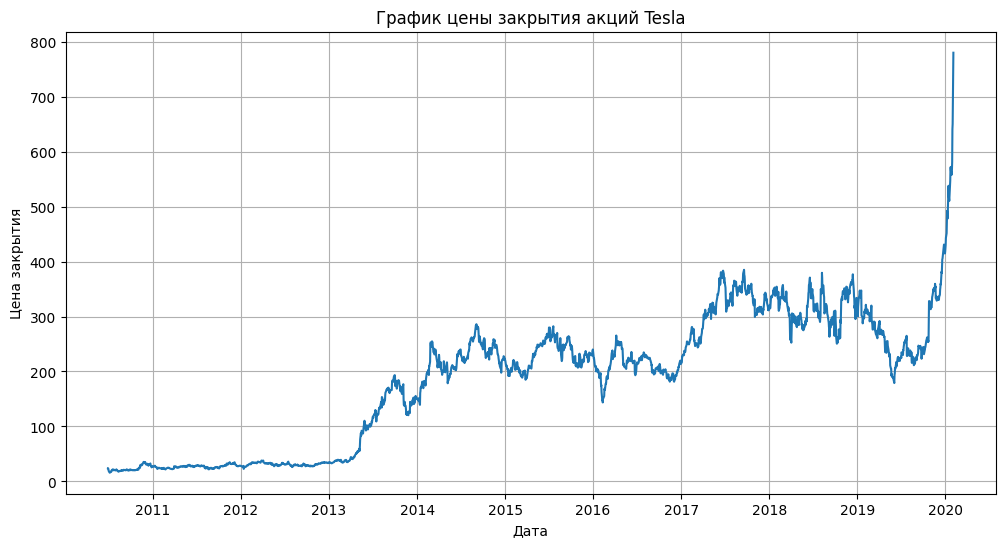

In [32]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.title('График цены закрытия акций Tesla')
plt.grid(True)
plt.show()

4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [33]:
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

min_open = df['Open'].min()
max_open = df['Open'].max()
df['Normalized_Open'] = df['Open'].apply(lambda x: normalize(x, min_open, max_open))
print(df.head())

                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

            Normalized_Open  
Date                         
2010-06-29         0.004349  
2010-06-30         0.014676  
2010-07-01         0.013474  
2010-07-02         0.010433  
2010-07-06         0.005870  


5. Что такое SMA (Simple Moving Average) с окном 12,15,30. 
Можно посмотреть внешние решения: 
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

SMA (Simple Moving Average) — это простое скользящее среднее, которое является одним из наиболее распространенных индикаторов анализа временных рядов и используется для сглаживания данных и выявления трендов. SMA вычисляется как среднее значение цен или других данных за определенный период времени, называемый окном.

Окно (window) — это число последовательных значений временного ряда, используемых для вычисления каждого значения скользящего среднего. Окно передвигается по временному ряду, обновляя среднее значение на каждом шаге.

SMA с окнами 12, 15 и 30 означает, что вычисляются три разных скользящих средних с окнами в 12, 15 и 30 периодов. В контексте финансовых данных, это может означать, например, 12, 15 или 30 дней, недель или месяцев.

Построить график с ценой закрытия и посчитаным SMA 12,15,30

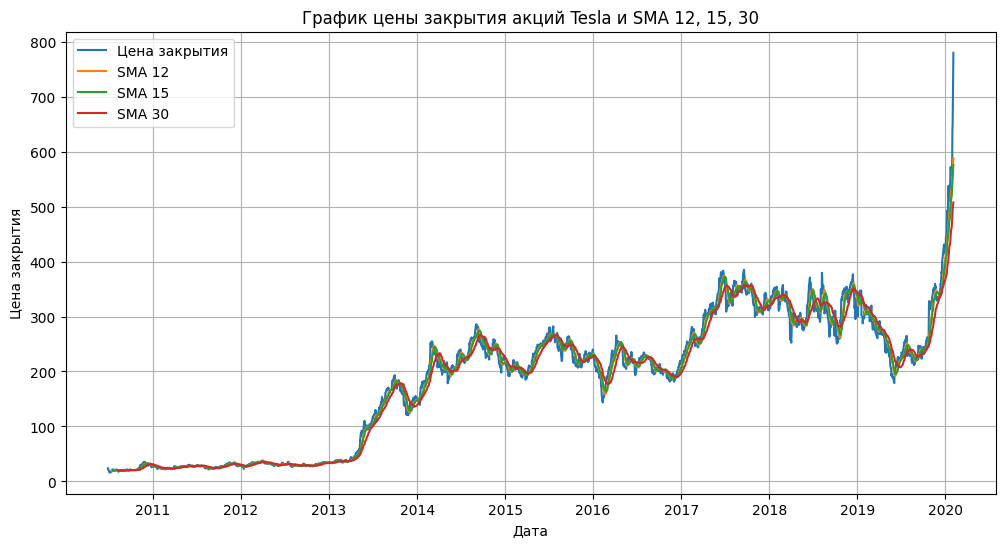

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['SMA_12'] = df['Close'].rolling(window=12).mean()
df['SMA_15'] = df['Close'].rolling(window=15).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Цена закрытия')
plt.plot(df['SMA_12'], label='SMA 12')
plt.plot(df['SMA_15'], label='SMA 15')
plt.plot(df['SMA_30'], label='SMA 30')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.title('График цены закрытия акций Tesla и SMA 12, 15, 30')
plt.legend()
plt.grid(True)
plt.show()

7. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

Если короткое SMA (например, SMA 12) пересекает длинное SMA (например, SMA 30) снизу вверх, это может указывать на возможный восходящий тренд, и инвесторы могут рассмотреть возможность покупки акций  как видно из графика это 2014 и 2016г.

Если короткое SMA пересекает длинное SMA сверху вниз, это может указывать на возможный нисходящий тренд, и инвесторы могут рассмотреть возможность продажи акций.Эти места также хорошо видно на графике
